#### Task 1

###### Team work 
We have built the cnn for the cats vs dogs classifier. We predicted the accuracy on the test data with the split of 70/30 for each of the age gender and face features for the UTK dataset 


In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf



2022-03-07 21:27:07.529884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import tensorflow_datasets as tfds

2022-03-07 21:30:20.113605: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-07 21:30:20.118923: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-07 21:30:21.659432: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-07 21:30:21.659464: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brijesh-Nitro): /proc/driver/nvidia/version does not exist
2022-03-07 21:30:21.662251: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flag

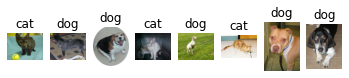

In [5]:
clsn = ['cat', 'dog']
(training_set, test_set), dataset_information = tfds.load('cats_vs_dogs',split=[tfds.Split.TRAIN.subsplit(tfds.percent[:70]),tfds.Split.TRAIN.subsplit(tfds.percent[70:])],with_info=True,as_supervised=True,)
i = 0
fig, ax = plt.subplots(1, 8)
for image, label1 in test_set.take(8):
    ax[i].axis('off')
    ax[i].set_title(clsn[label1])
    ax[i].imshow(image)
    i += 1
plt.show()

In [ ]:
# Train the data and display the training history.
#every epoch displays the validation sets and training sets.
def preprocess(img1, label1):
    return tf.image.resize(img1, [height, width]) / 255, label1
height = 200
height = 200
(training_set, test_set), dataset_info = tfds.load('cats_vs_dogs',
    split=[
        tfds.Split.TRAIN.subsplit(tfds.percent[:70]),#splitting the dataset for training
        tfds.Split.TRAIN.subsplit(tfds.percent[70:])
    ],
    with_info=True,
    as_supervised=True,
)
training_set = training_set.map(preprocess).batch(32)#preprocessing the data
test_set = test_set.map(preprocess).batch(32)
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(height, width, 3)),#describing the shape 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model.fit(training_set, epochs=10, validation_data=test_set)#displaying the history of the model data
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel1('Accuracy')
plt.xlabel1('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
(loss, accuracy) = model.evaluate(test_set)
print(loss)#results the loss
print(accuracy)#results the accuracy
model.save('model.h5')#saving the model

2022-03-07 21:32:37.583942: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 69337088 exceeds 10% of free system memory.
2022-03-07 21:32:37.651123: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 69337088 exceeds 10% of free system memory.
2022-03-07 21:32:37.666637: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 69337088 exceeds 10% of free system memory.


Epoch 1/10


2022-03-07 21:32:38.042779: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 69337088 exceeds 10% of free system memory.
2022-03-07 21:32:38.056172: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 69337088 exceeds 10% of free system memory.


      2/Unknown - 3s 755ms/step - loss: 2.8167 - accuracy: 0.3750

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


     50/Unknown - 29s 543ms/step - loss: 1.3501 - accuracy: 0.4812

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


     86/Unknown - 49s 541ms/step - loss: 1.1352 - accuracy: 0.4919

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


     94/Unknown - 53s 541ms/step - loss: 1.1064 - accuracy: 0.4946

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


    117/Unknown - 65s 536ms/step - loss: 1.0420 - accuracy: 0.5019

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


    140/Unknown - 77s 533ms/step - loss: 0.9960 - accuracy: 0.5079

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


    233/Unknown - 127s 539ms/step - loss: 0.8904 - accuracy: 0.5294

    391/Unknown - 209s 529ms/step - loss: 0.8104 - accuracy: 0.5569

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


    409/Unknown - 218s 528ms/step - loss: 0.8047 - accuracy: 0.5592

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


    476/Unknown - 252s 526ms/step - loss: 0.7863 - accuracy: 0.5672

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


    510/Unknown - 270s 525ms/step - loss: 0.7782 - accuracy: 0.5709

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 299s 583ms/step - loss: 0.7779 - accuracy: 0.5710 - val_loss: 0.5388 - val_accuracy: 0.7297
Epoch 2/10
  1/510 [..............................] - ETA: 10:55 - loss: 0.5302 - accuracy: 0.6875

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 49/510 [=>............................] - ETA: 4:02 - loss: 0.5652 - accuracy: 0.6940

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 85/510 [====>.........................] - ETA: 3:41 - loss: 0.5611 - accuracy: 0.6985

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:36 - loss: 0.5601 - accuracy: 0.6997

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:24 - loss: 0.5575 - accuracy: 0.7028

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:12 - loss: 0.5554 - accuracy: 0.7054

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


232/510 [============>.................] - ETA: 2:25 - loss: 0.5481 - accuracy: 0.7131

390/510 [=====================>........] - ETA: 1:02 - loss: 0.5404 - accuracy: 0.7204

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 52s - loss: 0.5397 - accuracy: 0.7210

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


475/510 [==========================>...] - ETA: 18s - loss: 0.5370 - accuracy: 0.7232

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.5355 - accuracy: 0.7245

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 295s 576ms/step - loss: 0.5355 - accuracy: 0.7246 - val_loss: 0.5162 - val_accuracy: 0.7589
Epoch 3/10
  2/510 [..............................] - ETA: 4:52 - loss: 0.4577 - accuracy: 0.8281 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:29 - loss: 0.4919 - accuracy: 0.7647

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 85/510 [====>.........................] - ETA: 4:07 - loss: 0.4884 - accuracy: 0.7645

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 4:00 - loss: 0.4869 - accuracy: 0.7652

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:43 - loss: 0.4833 - accuracy: 0.7673

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:29 - loss: 0.4809 - accuracy: 0.7688

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


232/510 [============>.................] - ETA: 2:34 - loss: 0.4721 - accuracy: 0.7731

390/510 [=====================>........] - ETA: 1:05 - loss: 0.4616 - accuracy: 0.7788

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 54s - loss: 0.4606 - accuracy: 0.7793

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


475/510 [==========================>...] - ETA: 18s - loss: 0.4572 - accuracy: 0.7813

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.4554 - accuracy: 0.7823

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 305s 596ms/step - loss: 0.4553 - accuracy: 0.7824 - val_loss: 0.5167 - val_accuracy: 0.7677
Epoch 4/10
  2/510 [..............................] - ETA: 4:39 - loss: 0.3825 - accuracy: 0.8359 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:01 - loss: 0.3925 - accuracy: 0.8139

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:41 - loss: 0.3969 - accuracy: 0.8123

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:36 - loss: 0.3967 - accuracy: 0.8126

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:24 - loss: 0.3957 - accuracy: 0.8139

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:12 - loss: 0.3953 - accuracy: 0.8149

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


233/510 [============>.................] - ETA: 2:24 - loss: 0.3909 - accuracy: 0.8184

391/510 [======================>.......] - ETA: 1:01 - loss: 0.3779 - accuracy: 0.8270

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 52s - loss: 0.3766 - accuracy: 0.8278

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


476/510 [===========================>..] - ETA: 17s - loss: 0.3719 - accuracy: 0.8306

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.3694 - accuracy: 0.8320

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 293s 574ms/step - loss: 0.3693 - accuracy: 0.8321 - val_loss: 0.6048 - val_accuracy: 0.7730
Epoch 5/10
  2/510 [..............................] - ETA: 4:46 - loss: 0.1447 - accuracy: 0.9453 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:24 - loss: 0.2353 - accuracy: 0.9040

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 4:00 - loss: 0.2481 - accuracy: 0.8992

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:56 - loss: 0.2492 - accuracy: 0.8988

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:42 - loss: 0.2515 - accuracy: 0.8978

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:26 - loss: 0.2541 - accuracy: 0.8967

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


233/510 [============>.................] - ETA: 2:34 - loss: 0.2576 - accuracy: 0.8943

390/510 [=====================>........] - ETA: 1:05 - loss: 0.2526 - accuracy: 0.8962

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 54s - loss: 0.2520 - accuracy: 0.8965

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


475/510 [==========================>...] - ETA: 18s - loss: 0.2495 - accuracy: 0.8974

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.2479 - accuracy: 0.8981

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 302s 591ms/step - loss: 0.2479 - accuracy: 0.8981 - val_loss: 0.7641 - val_accuracy: 0.7697
Epoch 6/10
  2/510 [..............................] - ETA: 4:30 - loss: 0.0721 - accuracy: 1.0000 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 3:58 - loss: 0.1624 - accuracy: 0.9433

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:38 - loss: 0.1661 - accuracy: 0.9394

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:34 - loss: 0.1661 - accuracy: 0.9389

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:21 - loss: 0.1673 - accuracy: 0.9371

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:10 - loss: 0.1687 - accuracy: 0.9354

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


233/510 [============>.................] - ETA: 2:22 - loss: 0.1709 - accuracy: 0.9323

391/510 [======================>.......] - ETA: 1:00 - loss: 0.1712 - accuracy: 0.9314

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 51s - loss: 0.1712 - accuracy: 0.9314

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


476/510 [===========================>..] - ETA: 17s - loss: 0.1708 - accuracy: 0.9315

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.9319

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 290s 567ms/step - loss: 0.1701 - accuracy: 0.9319 - val_loss: 0.8605 - val_accuracy: 0.7704
Epoch 7/10
  2/510 [..............................] - ETA: 4:36 - loss: 0.0557 - accuracy: 0.9766 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:16 - loss: 0.0653 - accuracy: 0.9764

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:50 - loss: 0.0759 - accuracy: 0.9732

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:45 - loss: 0.0768 - accuracy: 0.9729

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:32 - loss: 0.0794 - accuracy: 0.9720

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:19 - loss: 0.0826 - accuracy: 0.9707

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


232/510 [============>.................] - ETA: 2:27 - loss: 0.0932 - accuracy: 0.9660

390/510 [=====================>........] - ETA: 1:03 - loss: 0.1048 - accuracy: 0.9609

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 53s - loss: 0.1055 - accuracy: 0.9606

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


475/510 [==========================>...] - ETA: 18s - loss: 0.1065 - accuracy: 0.9600

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9599

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 305s 597ms/step - loss: 0.1066 - accuracy: 0.9599 - val_loss: 0.9572 - val_accuracy: 0.7614
Epoch 8/10
  2/510 [..............................] - ETA: 5:01 - loss: 0.2221 - accuracy: 0.9297 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:22 - loss: 0.0796 - accuracy: 0.9746

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:52 - loss: 0.0728 - accuracy: 0.9755

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:47 - loss: 0.0716 - accuracy: 0.9758

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:31 - loss: 0.0693 - accuracy: 0.9763

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:17 - loss: 0.0703 - accuracy: 0.9756

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


233/510 [============>.................] - ETA: 2:25 - loss: 0.0739 - accuracy: 0.9735

391/510 [======================>.......] - ETA: 1:02 - loss: 0.0772 - accuracy: 0.9718

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 53s - loss: 0.0773 - accuracy: 0.9717

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


476/510 [===========================>..] - ETA: 18s - loss: 0.0770 - accuracy: 0.9718

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.0767 - accuracy: 0.9719

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 300s 587ms/step - loss: 0.0767 - accuracy: 0.9719 - val_loss: 1.2132 - val_accuracy: 0.7514
Epoch 9/10
  2/510 [..............................] - ETA: 4:44 - loss: 0.0616 - accuracy: 0.9688 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:11 - loss: 0.0510 - accuracy: 0.9807

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:50 - loss: 0.0486 - accuracy: 0.9820

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:46 - loss: 0.0478 - accuracy: 0.9824

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:35 - loss: 0.0455 - accuracy: 0.9834

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:21 - loss: 0.0453 - accuracy: 0.9837

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


233/510 [============>.................] - ETA: 2:29 - loss: 0.0470 - accuracy: 0.9836

391/510 [======================>.......] - ETA: 1:03 - loss: 0.0488 - accuracy: 0.9832

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


409/510 [=======================>......] - ETA: 54s - loss: 0.0488 - accuracy: 0.9832

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


476/510 [===========================>..] - ETA: 18s - loss: 0.0489 - accuracy: 0.9833

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


510/510 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9833

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


510/510 [==============================] - 303s 593ms/step - loss: 0.0488 - accuracy: 0.9833 - val_loss: 1.2332 - val_accuracy: 0.7592
Epoch 10/10
  2/510 [..............................] - ETA: 4:44 - loss: 0.0086 - accuracy: 1.0000 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 50/510 [=>............................] - ETA: 4:07 - loss: 0.0276 - accuracy: 0.9895

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 86/510 [====>.........................] - ETA: 3:47 - loss: 0.0321 - accuracy: 0.9875

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 94/510 [====>.........................] - ETA: 3:43 - loss: 0.0327 - accuracy: 0.9874

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


117/510 [=====>........................] - ETA: 3:29 - loss: 0.0337 - accuracy: 0.9875

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


140/510 [=======>......................] - ETA: 3:17 - loss: 0.0348 - accuracy: 0.9873

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


232/510 [============>.................] - ETA: 2:27 - loss: 0.0374 - accuracy: 0.9867

336/510 [==================>...........] - ETA: 1:34 - loss: 0.0391 - accuracy: 0.9864

In [8]:
def preprocess(img1, label1):
    return tf.image.resize(img1, [HEIGHT, WIDTH]) / 255, tf.cast(label1, tf.float32)
HEIGHT = 200
WIDTH = 200
clsn = ['dog', 'cat']
(training_set, test_set), dataset_info = tfds.load(
    'cats_vs_dogs',
    split=[
        tfds.Split.TRAIN.subsplit(tfds.percent[:70]),
        tfds.Split.TRAIN.subsplit(tfds.percent[70:])
    ],
    with_info=True,
    as_supervised=True,
)

test_set = test_set.map(preprocess).batch(1)
model = keras.models.load_model('model.h5')
predictions = model.predict(test_set.take(8))
 


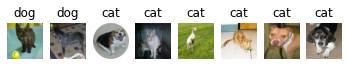

In [9]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in test_set.take(8):
    predictedLabel1 = int(predictions[i] >= 0.5)
    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel1])
    ax[i].imshow(image[0])
    i += 1
plt.show()